In [72]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

In [73]:
data=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [74]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [75]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [76]:
data['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [77]:
data['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [78]:
data['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [79]:
data['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [80]:
data.shape

(5110, 12)

In [81]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [83]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [84]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## **Filling Null Values**


In [85]:
data['bmi'].value_counts()

28.7    41
28.4    38
27.7    37
27.6    37
26.7    37
        ..
48.0     1
49.4     1
47.4     1
46.6     1
54.0     1
Name: bmi, Length: 418, dtype: int64

In [86]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

In [87]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Outliers detection

<AxesSubplot:ylabel='bmi'>

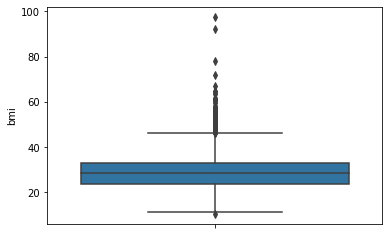

In [88]:
sns.boxplot(y=data['bmi'])

<AxesSubplot:ylabel='avg_glucose_level'>

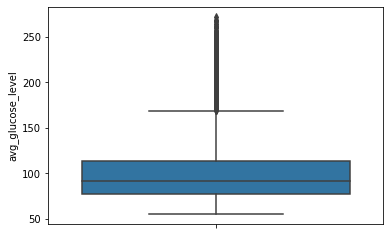

In [89]:
sns.boxplot(y=data['avg_glucose_level'])

<AxesSubplot:ylabel='hypertension'>

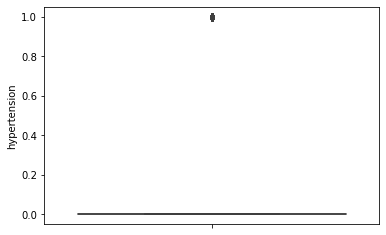

In [90]:
sns.boxplot(y=data['hypertension'])

<AxesSubplot:ylabel='heart_disease'>

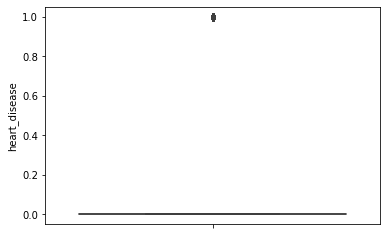

In [91]:
sns.boxplot(y=data['heart_disease'])

In [92]:
bmi_outliers=data[data['bmi']>50]
bmi_outliers['bmi'].shape

(79,)

In [93]:
print(data.shape)

(5110, 12)


In [94]:
# Dropping not necessary Id column
data.drop(columns='id',axis=1,inplace=True)

In [95]:
data.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


# Changing Categorical Value to Numerical Value

In [96]:
print("Unique 'gender': {}".format(data['gender'].unique()))
print("Unique 'ever_married': {}".format(data['ever_married'].unique()))
print("Unique 'work_type': {}".format(data['work_type'].unique()))
print("Unique 'Residence_type': {}".format(data['Residence_type'].unique()))
print("Unique 'smoking_status': {}".format(data['smoking_status'].unique()))

Unique 'gender': ['Male' 'Female' 'Other']
Unique 'ever_married': ['Yes' 'No']
Unique 'work_type': ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique 'Residence_type': ['Urban' 'Rural']
Unique 'smoking_status': ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [97]:
data.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [98]:
# number of 'other' is very small, converting the value to 'Male'
data['gender']=data['gender'].replace('Other','Male')

In [99]:
print ("Unique values are:\n",data.nunique())

Unique values are:
 gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          4
stroke                  2
dtype: int64


In [100]:
# create encoder for each categorical variable
from sklearn.preprocessing import LabelEncoder, StandardScaler
enc=LabelEncoder()

In [101]:
gender=enc.fit_transform(data['gender'])
smoking_status=enc.fit_transform(data['smoking_status'])
work_type=enc.fit_transform(data['work_type'])
Residence_type=enc.fit_transform(data['Residence_type'])
ever_married=enc.fit_transform(data['ever_married'])

In [102]:
data['work_type']=work_type
data['ever_married']=ever_married
data['Residence_type']=Residence_type
data['smoking_status']=smoking_status
data['gender']=gender

In [103]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [104]:
data['work_type'].value_counts()

2    2925
3     819
4     687
0     657
1      22
Name: work_type, dtype: int64

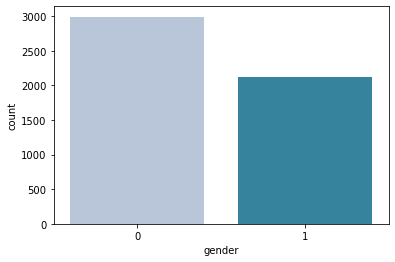

In [105]:
#Getting an idea about the distribution of gender 
p = sns.countplot(data=data, x = 'gender', palette='PuBuGn')

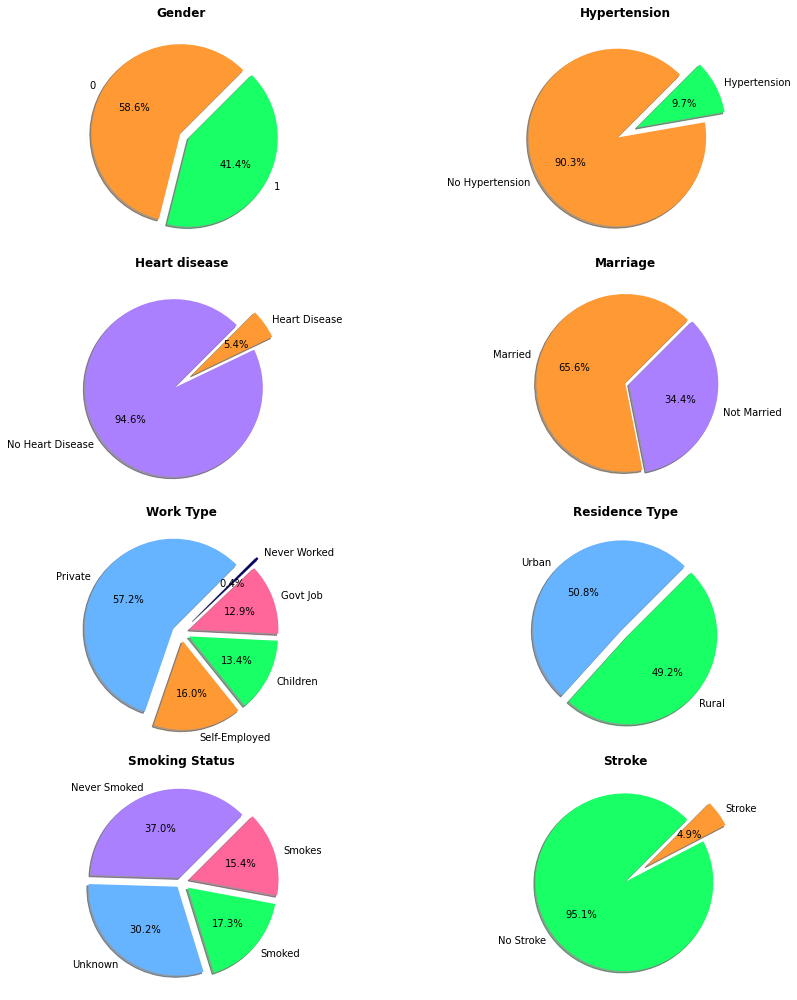

In [106]:
fig, ax = plt.subplots(4,2, figsize = (14,14))
((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = ax

labels = data['gender'].value_counts().index.tolist()[:2]
values = data['gender'].value_counts().tolist()[:2]
ax1.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#FF9933','#19FF66'],shadow=True, startangle=45,explode=[0.01, 0.1])
ax1.set_title("Gender", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["No Hypertension", "Hypertension"]
values = data['hypertension'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#FF9933','#19FF66'],shadow=True,startangle=45,explode=[0.1, 0.15])
ax2.set_title("Hypertension", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["No Heart Disease", "Heart Disease"]
values = data['heart_disease'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#AA80FF','#FF9933'],shadow=True, startangle=45,explode=[0.1, 0.15])
ax3.set_title("Heart disease", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Married", "Not Married"]
values = data['ever_married'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#FF9933','#AA80FF'],shadow=True,startangle=45,explode=[0, 0.05])
ax4.set_title("Marriage", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Private", "Self-Employed", "Children", "Govt Job", "Never Worked"]
values = data['work_type'].value_counts().tolist()
ax5.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#66b3ff','#FF9933','#19FF66','#FF6699','#000066'],shadow=True, startangle=45,explode=[0.1, 0.1, 0.1, 0.1, 0.2])
ax5.set_title("Work Type", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Urban", "Rural"]
values = data['Residence_type'].value_counts().tolist()
ax6.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#66b3ff','#19FF66'],shadow=True,startangle=45,explode=[0.05, 0.05])
ax6.set_title("Residence Type", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Never Smoked", "Unknown", "Smoked", "Smokes"]
values = data['smoking_status'].value_counts().tolist()
ax7.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45,explode=[0.05, 0.07, 0.1, 0.1],colors=['#AA80FF','#66b3ff','#19FF66','#FF6699'])
ax7.set_title("Smoking Status", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["No Stroke", "Stroke"]
values = data['stroke'].value_counts().tolist()
ax8.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45,explode=[0.01, 0.3],colors=['#19FF66','#FF9933'])
ax8.set_title("Stroke", fontdict={'fontsize': 12},fontweight ='bold')

plt.tight_layout()
plt.show()

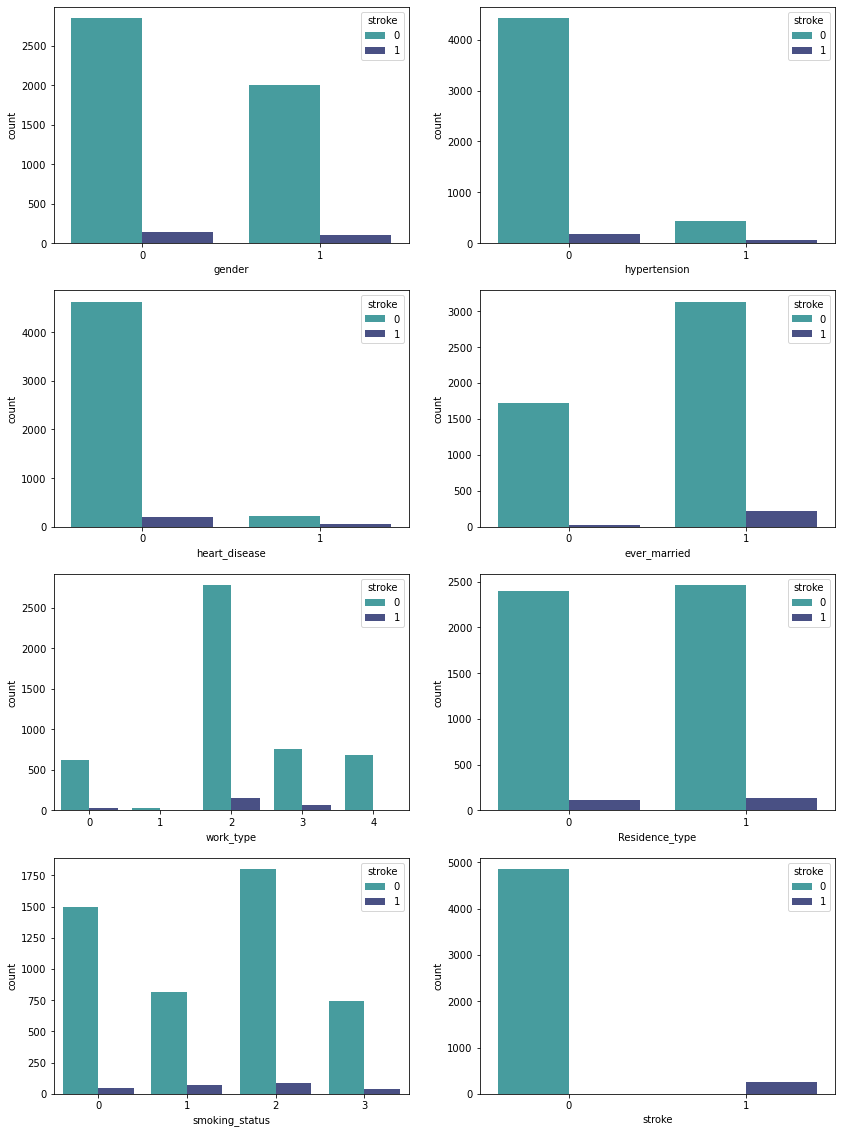

In [107]:
df_st=['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status', 'stroke']
fig, axs = plt.subplots(4, 2, figsize=(14,20))
axs = axs.flatten()
for i, col_name in enumerate(df_st):
    sns.countplot(x=col_name, data=data, ax=axs[i], hue =data['stroke'],palette='mako_r')

<AxesSubplot:title={'center':'Correlation map for variables'}>

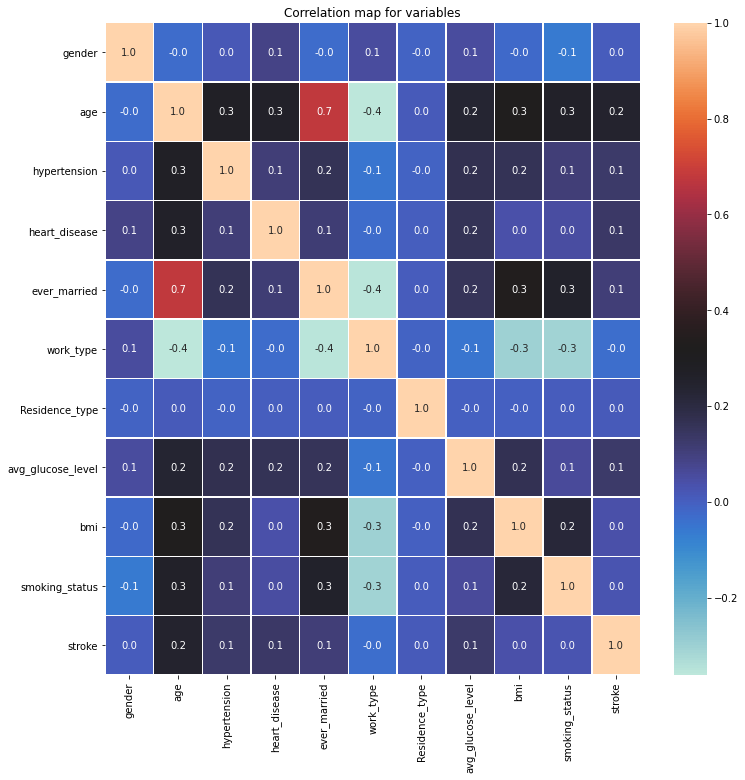

In [108]:
#correlation map for features
f,ax = plt.subplots(figsize=(12, 12))
ax.set_title('Correlation map for variables')
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap="icefire")

# Class (Target) Distribution

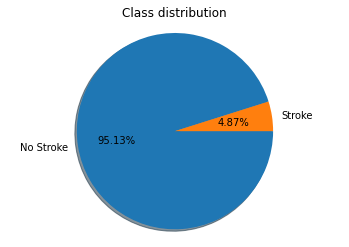

# samples associated with no stroke: 4861
# samples associated with stroke: 249


In [138]:
class_occur = data['stroke'].value_counts()
class_names = ['No Stroke','Stroke']
fig, ax = plt.subplots()
ax.pie(class_occur, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=0, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()
print("# samples associated with no stroke: {}".format(class_occur[0]))
print("# samples associated with stroke: {}".format(class_occur[1]))


# Handle Imbalanced Class

There are several techniques that can be used to handle highly imbalanced class. We are going to use one of oversampling technique called Synthetic Minority Oversampling Technique (SMOTE), by synthesising new samples from the minority class to have the same number of samples as the majority class (illustrated in figure below). Oversampling technique is chosen because we do not want to loose significant amount of information (95.13%) as if we use undersampling technique

In [139]:
# create the  object with the desired sampling strategy.
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')

# fit the object to our training data
X, y = smote.fit_resample(data.loc[:,data.columns!='stroke'], data['stroke'])
print("Shape of X: {}".format(X.shape))
print("Shape of y: {}".format(y.shape))

Shape of X: (9722, 10)
Shape of y: (9722,)


In [140]:
y

0       1
1       1
2       1
3       1
4       1
       ..
9717    1
9718    1
9719    1
9720    1
9721    1
Name: stroke, Length: 9722, dtype: int64

In [141]:
occurrences = np.count_nonzero(y==0)
print(occurrences)

4861


In [142]:
occurrences = np.count_nonzero(y==1)
print(occurrences)

4861


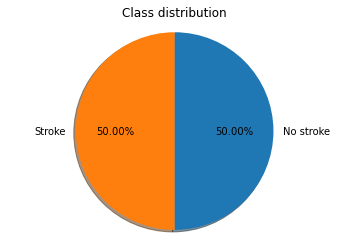

# samples associated with no stroke: 4861
# samples associated with stroke: 4861


In [143]:
_, class_counts = np.unique(y, return_counts=True)
class_names = ['No stroke', 'Stroke']
fig, ax = plt.subplots()
ax.pie(class_counts, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=90, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()
print("# samples associated with no stroke: {}".format(class_counts[0]))
print("# samples associated with stroke: {}".format(class_counts[1]))

In [115]:
a = data['stroke'].value_counts()
print(a)

0    4861
1     249
Name: stroke, dtype: int64


In [116]:
data.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


# Train-Test Split

In [144]:

# creating dataset split for prediction
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42) # 80-20 split

# Checking split 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (7777, 10)
y_train: (7777,)
X_test: (1945, 10)
y_test: (1945,)


# Data Normalisation

In [145]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [146]:
X_train_std

array([[-0.691343  ,  0.27117191, -0.30804137, ..., -0.54215893,
         0.00776   , -0.2820867 ],
       [ 1.44646   ,  0.10269541, -0.30804137, ..., -0.60304798,
         0.23517514, -1.31058563],
       [-0.691343  , -0.67844116, -0.30804137, ..., -0.4443275 ,
        -0.8888989 ,  0.74641224],
       ...,
       [-0.691343  , -0.62209219, -0.30804137, ..., -0.29997759,
        -0.13810889, -0.2820867 ],
       [-0.691343  , -0.40712798, -0.30804137, ..., -0.33245939,
         3.20598393,  1.77491118],
       [-0.691343  ,  0.8515145 , -0.30804137, ...,  2.02983124,
         1.13630956, -0.2820867 ]])

In [147]:
X_test_std

array([[-0.691343  , -2.17066361, -0.30804137, ..., -0.5415333 ,
        -1.83977057, -1.31058563],
       [ 1.44646   ,  0.29892815, -0.30804137, ..., -0.78896918,
        -0.28392375,  0.74641224],
       [ 1.44646   ,  0.49724927, -0.30804137, ..., -0.2806887 ,
         0.56808188,  0.74641224],
       ...,
       [-0.691343  ,  1.22075106, -0.30804137, ..., -0.6035199 ,
        -0.24062047, -0.2820867 ],
       [-0.691343  , -0.90453547, -0.30804137, ...,  0.01599713,
        -0.99625538,  0.74641224],
       [-0.691343  , -0.38078435, -0.30804137, ..., -0.69840991,
         0.1661976 ,  0.74641224]])

# Training Our Model

### Decision Tree

In [148]:
#import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

Hyperparameter Tuning

In [122]:
param_grid = {
            "criterion" : ["gini", "entropy"],
            "max_depth" : [1,2,3,4,5,6,7,8,9,10,None]   
}

In [123]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
clf = DecisionTreeClassifier()
grid = GridSearchCV(clf, param_grid, cv = 10)
grid.fit(X_train_std, y_train_res)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]})

In [124]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy')

In [125]:
grid.best_score_

0.9186212613677401

In [126]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': None}

In [127]:
rndm_dt = RandomizedSearchCV(clf, param_grid, cv = 10)
rndm_dt.fit(X_train_std, y_train_res)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, None]})

In [128]:
rndm_dt.best_params_

{'max_depth': None, 'criterion': 'gini'}

In [129]:
rndm_dt.best_score_

0.9099056108211038

In [130]:
rndm_dt.best_estimator_

DecisionTreeClassifier()

In [150]:
# Create Decision Tree classifer object
dt = DecisionTreeClassifier(criterion= 'entropy')

# Train the Classifier/fitting the model
dt = clf.fit(X_train_std,y_train)

In [151]:
# predict the response
y_pred = dt.predict(X_test_std)

In [152]:
acc_dt = accuracy_score(y_test, y_pred)
print ("Decision Tree Accuracy:",acc_dt *100,"%")

Decision Tree Accuracy: 89.61439588688947 %


<AxesSubplot:>

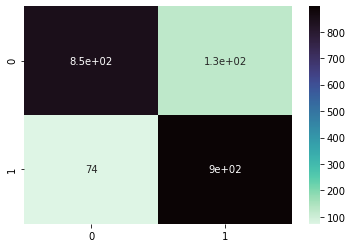

In [153]:
#Confusion Matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot=True,cmap="mako_r")

In [154]:
print("Classification report for DT: \n{}".format(classification_report(y_test,y_pred)))

print("Confusion matrix for DT: \n{}".format(confusion_matrix(y_test,y_pred)))
prec_dtree = precision_score(y_test,y_pred)
rec_dtree = recall_score(y_test,y_pred)
f1_dtree = f1_score(y_test,y_pred)
print("Precision score for DT: {:.2f}".format(prec_dtree))
print("Recall score for DT: {:.2f}".format(rec_dtree))
print("F1 score for DT: {:.2f}".format(f1_dtree))

Classification report for DT: 
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       975
           1       0.88      0.92      0.90       970

    accuracy                           0.90      1945
   macro avg       0.90      0.90      0.90      1945
weighted avg       0.90      0.90      0.90      1945

Confusion matrix for DT: 
[[847 128]
 [ 74 896]]
Precision score for DT: 0.88
Recall score for DT: 0.92
F1 score for DT: 0.90


## KNN

In [136]:
from sklearn.neighbors import KNeighborsClassifier


In [137]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
grid = GridSearchCV(knn_2, hyperparameters, cv=10)

grid.fit(X_train_std,y_train)

ValueError: Found input variables with inconsistent numbers of samples: [7802, 4088]

In [ ]:
grid.best_params_

{'leaf_size': 1, 'n_neighbors': 1, 'p': 1}

In [ ]:
grid.best_score_

0.9056196299126892

In [ ]:
grid.best_estimator_

KNeighborsClassifier(leaf_size=1, n_neighbors=1, p=1)

In [ ]:
knn=KNeighborsClassifier(leaf_size=1, n_neighbors=1, p=1)
knn.fit(X_train_std,y_train)
y_pred_knn = knn.predict(X_test_std)


In [ ]:
acc_knn = accuracy_score(y_test, y_pred_knn)
print ("KNN Accuracy:",acc_knn *100,"%")

KNN Accuracy: 90.69408740359897 %


In [ ]:
print("Classification report for KNN: \n{}".format(classification_report(y_test,y_pred_knn)))
print("Confusion matrix for KNN: \n{}".format(confusion_matrix(y_test,y_pred_knn)))
print("Accuracy score for KNN: {:.2f}".format(accuracy_score(y_test,y_pred_knn)))
# calculate precision, recall, and f1 scores
prec_knn = precision_score(y_test,y_pred_knn)
rec_knn = recall_score(y_test,y_pred_knn)
f1_knn = f1_score(y_test,y_pred_knn)
print("Precision score for KNN: {:.2f}".format(prec_knn))
print("Recall score for KNN: {:.2f}".format(rec_knn))
print("F1 score for KNN: {:.2f}".format(f1_knn))

Classification report for KNN: 
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       975
           1       0.86      0.96      0.91       970

    accuracy                           0.91      1945
   macro avg       0.91      0.91      0.91      1945
weighted avg       0.91      0.91      0.91      1945

Confusion matrix for KNN: 
[[828 147]
 [ 34 936]]
Accuracy score for KNN: 0.91
Precision score for KNN: 0.86
Recall score for KNN: 0.96
F1 score for KNN: 0.91


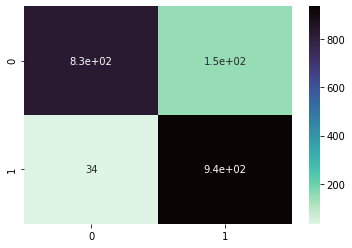

In [ ]:
#Confusion Matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_knn))
sns.heatmap(cm, annot=True,cmap="mako_r")

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
param_grid_lr = {
    "penalty" : ['l1', 'l2'],
    'C' : np.logspace(-4,4,20),
}

In [ ]:
lr = LogisticRegression()
grid_lr = GridSearchCV(lr,param_grid_lr,cv = 10)
grid_lr.fit(X_train_std,y_train)


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [ ]:
grid_lr.best_estimator_

LogisticRegression(C=0.23357214690901212)

In [ ]:
grid_lr.best_params_

{'C': 0.23357214690901212, 'penalty': 'l2'}

In [ ]:
grid_lr.best_score_

0.8004403595663236

In [ ]:
rndm_lr = RandomizedSearchCV(lr,param_grid_lr,cv = 10)
rndm_lr.fit(X_train_std,y_train)

RandomizedSearchCV(cv=10, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2']})

In [ ]:
rndm_lr.best_score_

0.8001834555819132

In [ ]:
rndm_lr.best_estimator_

LogisticRegression(C=3792.690190732246)

In [ ]:
lr = LogisticRegression(C=0.23357214690901212)
lr.fit(X_train_std,y_train)
y_pred_lr=lr.predict(X_test_std)

In [ ]:
acc_lr = accuracy_score(y_test,y_pred_lr)
print("Logistic Regression Accuracy:",acc_lr*100,"%")

Logistic Regression Accuracy: 79.94858611825192 %


In [ ]:
print("Classification report for LR: \n{}".format(classification_report(y_test,y_pred_lr)))
print("Confusion matrix for LR: \n{}".format(confusion_matrix(y_test,y_pred_lr)))
print("Accuracy score for LR: {:.2f}".format(accuracy_score(y_test,y_pred_lr)))
# calculate precision, recall, and f1 scores
prec_logit = precision_score(y_test,y_pred_lr)
rec_logit = recall_score(y_test,y_pred_lr)
f1_logit = f1_score(y_test,y_pred_lr)
print("Precision score for LR: {:.2f}".format(prec_logit))
print("Recall score for LR: {:.2f}".format(rec_logit))
print("F1 score for LR: {:.2f}".format(f1_logit))

Classification report for LR: 
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       975
           1       0.78      0.83      0.80       970

    accuracy                           0.80      1945
   macro avg       0.80      0.80      0.80      1945
weighted avg       0.80      0.80      0.80      1945

Confusion matrix for LR: 
[[754 221]
 [169 801]]
Accuracy score for LR: 0.80
Precision score for LR: 0.78
Recall score for LR: 0.83
F1 score for LR: 0.80


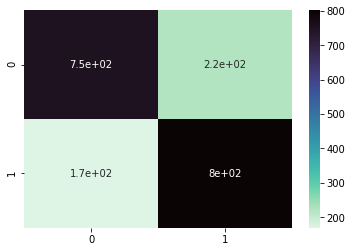

In [ ]:
#Confusion Matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_lr))
sns.heatmap(cm, annot=True,cmap="mako_r")

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4,None]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, None], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
rf = RandomForestClassifier()

grid_rf = GridSearchCV(rf,random_grid,cv=10,verbose=3)

grid_rf.fit(X_train_std,y_train)

Fitting 10 folds for each of 480 candidates, totalling 4800 fits
[CV 1/10] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.793 total time=   0.0s
[CV 2/10] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.770 total time=   0.0s
[CV 3/10] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.806 total time=   0.0s
[CV 4/10] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.784 total time=   0.0s
[CV 5/10] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.815 total time=   0.0s
[CV 6/10] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.783 total time=   0.0s
[CV 7/10] END bootstrap

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=3)

In [ ]:
grid_rf.best_score_

0.946380846509381

In [ ]:
grid_rf.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 72}

In [ ]:
grid_rf.best_estimator_

RandomForestClassifier(bootstrap=False, n_estimators=72)

In [ ]:
rf = RandomForestClassifier(bootstrap=False, n_estimators=72)
rf.fit(X_train_std,y_train)

y_pred_rf = rf.predict(X_test_std)

In [ ]:
acc_rf = accuracy_score(y_test,y_pred_rf)
print("Random Forest Accuracy:",acc_rf*100,"%")

Random Forest Accuracy: 95.4241645244216 %


In [ ]:
print("Classification report for RF: \n{}".format(classification_report(y_test,y_pred_rf)))
print("Confusion matrix for RF: \n{}".format(confusion_matrix(y_test,y_pred_rf)))
print("Accuracy score for RF: {:.2f}".format(accuracy_score(y_test,y_pred_rf)))
# calculate precision, recall, and f1 scores
prec_rf = precision_score(y_test,y_pred_rf)
rec_rf = recall_score(y_test,y_pred_rf)
f1_rf = f1_score(y_test,y_pred_rf)
print("Precision score for RF: {:.2f}".format(prec_rf))
print("Recall score for RF: {:.2f}".format(rec_rf))
print("F1 score for RF: {:.2f}".format(f1_rf))

Classification report for RF: 
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       975
           1       0.95      0.96      0.95       970

    accuracy                           0.95      1945
   macro avg       0.95      0.95      0.95      1945
weighted avg       0.95      0.95      0.95      1945

Confusion matrix for RF: 
[[924  51]
 [ 38 932]]
Accuracy score for RF: 0.95
Precision score for RF: 0.95
Recall score for RF: 0.96
F1 score for RF: 0.95


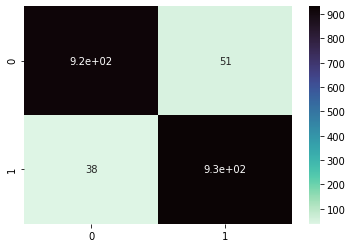

In [ ]:
#Confusion Matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_rf))
sns.heatmap(cm, annot=True,cmap="mako_r")

## XGBoost

In [ ]:
import xgboost

In [ ]:
param_grid_xgb={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:
xgb=xgboost.XGBClassifier()
rndm_xgb = RandomizedSearchCV(xgb,param_distributions=param_grid_xgb,cv=10,verbose=3)
rndm_xgb.fit(X_train_std,y_train)

In [ ]:
rndm_xgb.best_score_

0.9549958147644523

In [ ]:
rndm_xgb.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.0,
 'learning_rate': 0.3,
 'max_depth': 12,
 'min_child_weight': 3}

In [ ]:
rndm_xgb.best_estimator_

XGBClassifier(colsample_bytree=0.7, gamma=0.0, learning_rate=0.3, max_depth=12,
              min_child_weight=3)

In [ ]:
rndm_xgb.best_score_

0.9549958147644523

In [ ]:
grid_xgb = GridSearchCV(xgb,param_grid_xgb,verbose=3)
grid_xgb.fit(X_train_std,y_train)

In [ ]:
xgb=xgboost.XGBClassifier(colsample_bytree=0.7, gamma=0.0, learning_rate=0.3, max_depth=12,
              min_child_weight=3)
xgb.fit(X_train_std,y_train)

y_pred_xgb = xgb.predict(X_test_std)

In [ ]:
acc_xgb = accuracy_score(y_test,y_pred_xgb)
print("XGBoost Accuracy:",acc_xgb*100,"%")

XGBoost Accuracy: 96.19537275064268 %


In [ ]:
print("Classification report for XGBoost: \n{}".format(classification_report(y_test,y_pred_xgb)))
print("Confusion matrix for XGBoost: \n{}".format(confusion_matrix(y_test,y_pred_xgb)))
print("Accuracy score for XGBoost: {:.2f}".format(accuracy_score(y_test,y_pred_xgb)))
# calculate precision, recall, and f1 scores
prec_xgb = precision_score(y_test,y_pred_xgb)
rec_xgb = recall_score(y_test,y_pred_xgb)
f1_xgb = f1_score(y_test,y_pred_xgb)
print("Precision score for XGBoost: {:.2f}".format(prec_xgb))
print("Recall score for XGBoost: {:.2f}".format(rec_xgb))
print("F1 score for XGBoost: {:.2f}".format(f1_xgb))

Classification report for XGBoost: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       975
           1       0.96      0.96      0.96       970

    accuracy                           0.96      1945
   macro avg       0.96      0.96      0.96      1945
weighted avg       0.96      0.96      0.96      1945

Confusion matrix for XGBoost: 
[[939  36]
 [ 38 932]]
Accuracy score for XGBoost: 0.96
Precision score for XGBoost: 0.96
Recall score for XGBoost: 0.96
F1 score for XGBoost: 0.96


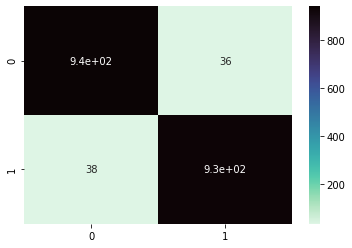

In [ ]:
#Confusion Matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_xgb))
sns.heatmap(cm, annot=True,cmap="mako_r")

## SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid_svm = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid_svm.fit(X_train_std,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.833, total=   1.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.795, total=   1.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.805, total=   1.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.812, total=   1.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.825, total=   1.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.845, total=   0.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.828, total=   0.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.840, total=   0.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.839, total=   0.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  2.3min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
sv=SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
sv.fit(X_train_std,y_train)

SVC(C=100, gamma=1)

In [ ]:
y_pred_svm = sv.predict(X_test_std)


In [ ]:
acc_svm = accuracy_score(y_test,y_pred_svm)
print("SVM Accuracy:",acc_svm*100,"%")

SVM Accuracy: 90.95115681233933 %


In [ ]:
print("Confusion matrix for XGBoost: \n{}".format(confusion_matrix(y_test,y_pred_svm)))

Confusion matrix for XGBoost: 
[[851 124]
 [ 52 918]]


In [ ]:
print("Classification report for SVM: \n{}".format(classification_report(y_test,y_pred_svm)))
print("Confusion matrix for SVM: \n{}".format(confusion_matrix(y_test,y_pred_svm)))
print("Accuracy score for SVM: {:.2f}".format(accuracy_score(y_test,y_pred_svm)))
# calculate precision, recall, and f1 scores
prec_svm = precision_score(y_test,y_pred_svm)
rec_svm = recall_score(y_test,y_pred_svm)
f1_svm = f1_score(y_test,y_pred_svm)
print("Precision score for SVM: {:.2f}".format(prec_svm))
print("Recall score for SVM: {:.2f}".format(rec_svm))
print("F1 score for SVM: {:.2f}".format(f1_svm))

Classification report for SVM: 
              precision    recall  f1-score   support

           0       0.94      0.87      0.91       975
           1       0.88      0.95      0.91       970

    accuracy                           0.91      1945
   macro avg       0.91      0.91      0.91      1945
weighted avg       0.91      0.91      0.91      1945

Confusion matrix for SVM: 
[[851 124]
 [ 52 918]]
Accuracy score for SVM: 0.91
Precision score for SVM: 0.88
Recall score for SVM: 0.95
F1 score for SVM: 0.91


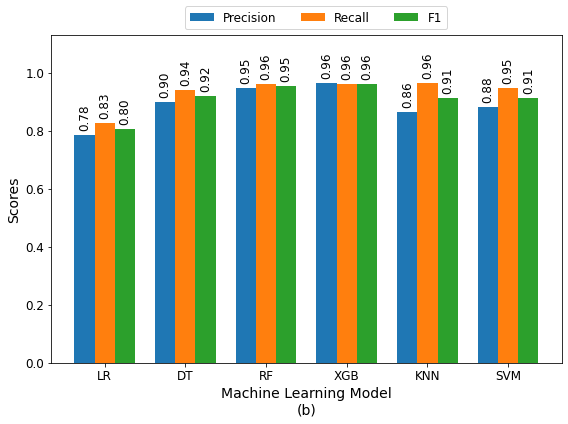

In [ ]:
ml_names = ['LR', 'DT', 'RF', 'XGB','KNN','SVM']
prec_all = [prec_logit, prec_dtree, prec_rf, prec_xgb,prec_knn,prec_svm]
rec_all = [rec_logit, rec_dtree, rec_rf,rec_xgb,rec_knn,rec_svm]
f1_all = [f1_logit, f1_dtree, f1_rf,f1_xgb,f1_knn,f1_svm]

def autolabel(bars):
    """Attach a text label above each bar in displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    fontsize=12,
                    rotation=90,
                    ha='center', va='bottom')

width = 0.25  # the width of the bars
r1 = np.arange(len(ml_names))  # the label locations
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

fig, ax = plt.subplots(figsize=(8,6))
bar1 = ax.bar(r1, prec_all, width, label='Precision')
bar2 = ax.bar(r2, rec_all, width, label='Recall')
bar3 = ax.bar(r3, f1_all, width, label='F1')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylim([0,1.13])
ax.set_ylabel('Scores',fontsize=14)
#ax.set_title('Performance benchmark across ML models')
ax.set_xticks(r2)
ax.set_xticklabels(ml_names)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("Machine Learning Model\n(b)",fontsize=14)
ax.legend(loc='lower left',ncol=3,bbox_to_anchor=(0.25,1),fontsize=12)
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
fig.tight_layout()
# fig.savefig("ml_benchmark_f1.pdf", bbox_inches='tight')
plt.show()

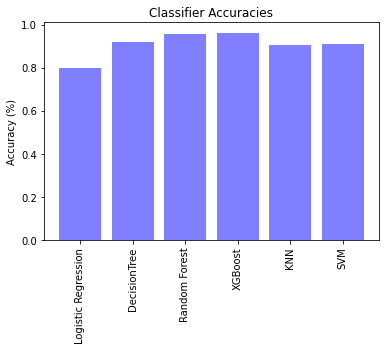

In [ ]:
# visualizing accuracies for all ML Algorithms using Matplotlib
predictors_group = ('Logistic Regression', 'DecisionTree','Random Forest', 'XGBoost','KNN','SVM')
x_pos = np.arange(len(predictors_group))
accuracies1 = [acc_lr, acc_dt, acc_rf, acc_xgb, acc_knn, acc_svm]
    
plt.bar(x_pos, accuracies1, align='center', alpha=0.5, color='blue')
plt.xticks(x_pos, predictors_group, rotation='vertical')
plt.ylabel('Accuracy (%)')
plt.title('Classifier Accuracies')
plt.show()

In [ ]:
import pickle

with open('model.pickle','wb') as f:
  pickle.dump(xgb,f)